In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import pickle
from pathlib import Path
import os
import pandas as pd
import scanpy as sc
import cellink as cl
from cellink.tl._burden_testing import *
from cellink.tl._eqtl import _get_pb_data
from plotnine import *
from itertools import islice
from plotting_report import *

import warnings
warnings.filterwarnings("ignore")

/data/nasif12/home_if12/l_mai/.conda/envs/mm_scgenetics/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
eigenvec = pd.read_csv("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/input_data/pcdir/wgs.dose.filtered.R2_0.8.filtered.pruned.eigenvec", sep=' ', header=None)

out_path = Path("/s/project/sys_gen_students/2024_2025/project04_rare_variant_sc/output/")
save_dir = out_path / "data_plots/pb_expression"

df_burdens = pd.read_parquet(out_path/"burdens/all_burdens_newest.parquet")
df_final = pd.read_csv(out_path/"association/all_results_FDR_corrected.csv")
all_results = pd.read_csv(out_path/"association/all_results.csv")

In [13]:
df_final = pd.read_csv(out_path/"association/all_results_FDR_corrected.csv")

# Analysis of FOLR3 (ENSG00000110203)

In [ ]:
chrom = "11"
data = pd.read_pickle(out_path/f"annotations/chr{chrom}_data.pkl")
# filter out non-immune cell types
data.adata = data.adata[~data.adata.obs["cell_label"].isin(["Erythrocytes", "Platelets"])]

In [19]:
# infos to "ENSG00000110203" significant in our data
df_final.query("burden_gene =='ENSG00000110203' & significant")

burden_gene      target_gene              burden_type  \
240137  ENSG00000110203  ENSG00000110203               CADD_PHRED   
250464  ENSG00000110203  ENSG00000110203                DNA_LM_up   
260791  ENSG00000110203  ENSG00000110203              DNA_LM_down   
271118  ENSG00000110203  ENSG00000110203            MAF_beta_1.25   
291772  ENSG00000110203  ENSG00000110203  GENE_TSS_DISTANCE_SAIGE   

              pvalue      beta cell_type  chromosome  significant  \
240137  1.854605e-13  0.418868    Mono C          11         True   
250464  7.395324e-06  0.254293    Mono C          11         True   
260791  1.140701e-05  0.249120    Mono C          11         True   
271118  8.808632e-10  0.349550    Mono C          11         True   
291772  4.988800e-17  0.473133    Mono C          11         True   

        FDR_corrected             celltype-annotation  
240137   1.915250e-09               Mono C-CADD_PHRED  
250464   3.818576e-03                Mono C-DNA_LM_up  
260791   5.609533e-03              Mono C-DNA_LM_down  
271118   4.548337e-06            Mono C-MAF_beta_1.25  
291772   5.151934e-13  Mono C-GENE_TSS_DISTANCE_SAIGE

In [21]:
# infos to "ENSG00000110203" in our data in general
df_final.query("burden_gene =='ENSG00000110203'")

burden_gene      target_gene              burden_type  \
157630  ENSG00000110203  ENSG00000110203               CADD_PHRED   
171732  ENSG00000110203  ENSG00000110203                DNA_LM_up   
185834  ENSG00000110203  ENSG00000110203              DNA_LM_down   
199936  ENSG00000110203  ENSG00000110203            MAF_beta_1.25   
214038  ENSG00000110203  ENSG00000110203          DNA_LM_combined   
228140  ENSG00000110203  ENSG00000110203  GENE_TSS_DISTANCE_SAIGE   
240137  ENSG00000110203  ENSG00000110203               CADD_PHRED   
250464  ENSG00000110203  ENSG00000110203                DNA_LM_up   
260791  ENSG00000110203  ENSG00000110203              DNA_LM_down   
271118  ENSG00000110203  ENSG00000110203            MAF_beta_1.25   
281445  ENSG00000110203  ENSG00000110203          DNA_LM_combined   
291772  ENSG00000110203  ENSG00000110203  GENE_TSS_DISTANCE_SAIGE   

              pvalue      beta cell_type  chromosome  significant  \
157630  5.378544e-01 -0.000181    CD4 NC          11        False   
171732  6.599191e-01 -0.000128    CD4 NC          11        False   
185834  6.661482e-01 -0.000125    CD4 NC          11        False   
199936  4.466539e-01 -0.000223    CD4 NC          11        False   
214038  4.462070e-01 -0.000221    CD4 NC          11        False   
228140  8.673147e-01  0.000049    CD4 NC          11        False   
240137  1.854605e-13  0.418868    Mono C          11         True   
250464  7.395324e-06  0.254293    Mono C          11         True   
260791  1.140701e-05  0.249120    Mono C          11         True   
271118  8.808632e-10  0.349550    Mono C          11         True   
281445  5.186407e-04  0.197136    Mono C          11        False   
291772  4.988800e-17  0.473133    Mono C          11         True   

        FDR_corrected             celltype-annotation  
157630   9.562531e-01               CD4 NC-CADD_PHRED  
171732   9.968491e-01                CD4 NC-DNA_LM_up  
185834   9.951087e-01              CD4 NC-DNA_LM_down  
199936   9.499223e-01            CD4 NC-MAF_beta_1.25  
214038   9.916293e-01          CD4 NC-DNA_LM_combined  
228140   9.884332e-01  CD4 NC-GENE_TSS_DISTANCE_SAIGE  
240137   1.915250e-09               Mono C-CADD_PHRED  
250464   3.818576e-03                Mono C-DNA_LM_up  
260791   5.609533e-03              Mono C-DNA_LM_down  
271118   4.548337e-06            Mono C-MAF_beta_1.25  
281445   1.245582e-01          Mono C-DNA_LM_combined  
291772   5.151934e-13  Mono C-GENE_TSS_DISTANCE_SAIGE

Getting PB CD8 ET
[2025-02-04 15:59:27,121] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-02-04 15:59:27,122] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2025-02-04 15:59:27,124] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
pb X not calculated for genen ENSG00000110203 in cell type CD8 ET
Getting PB CD8 NC
[2025-02-04 15:59:31,912] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-02-04 15:59:31,912] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2025-02-04 15:59:31,913] INFO:cellink._core.donordata: Dropping 0/981 donors from single-cell data
pb X not calculated for genen ENSG00000110203 in cell type CD8 NC
Getting PB CD8 ET
[2025-02-04 15:59:38,969] INFO:cellink._core.donordata: Keeping 981/981 donors
[2025-02-04 15:59:38,970] INFO:cellink._core.donordata: Dropping 0/981 donors from genetic data
[2025-02-04 15:59:38,970] INFO:cellink._core.donordata: Dropping 0/981 donors from single

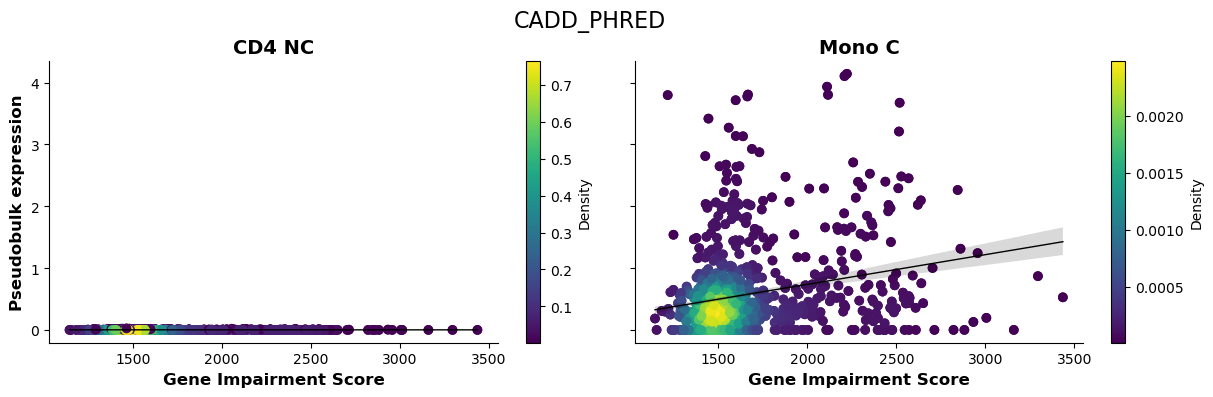

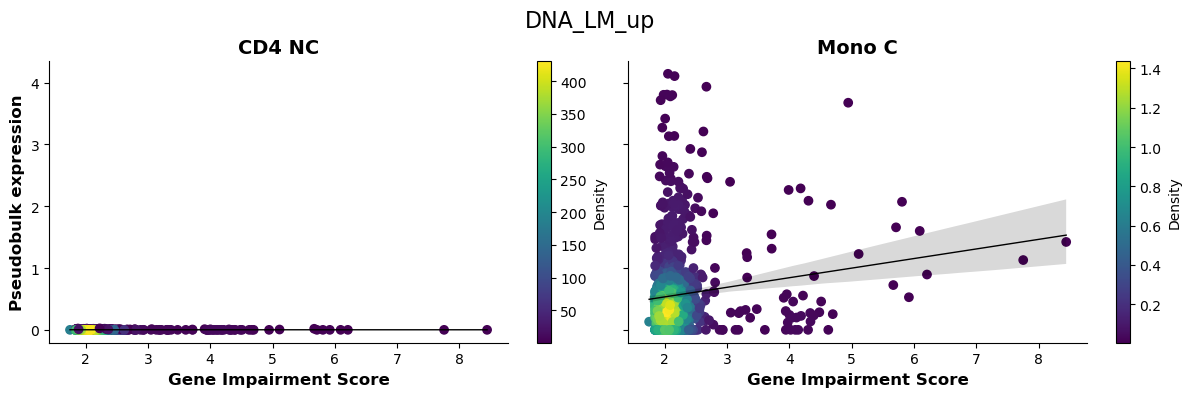

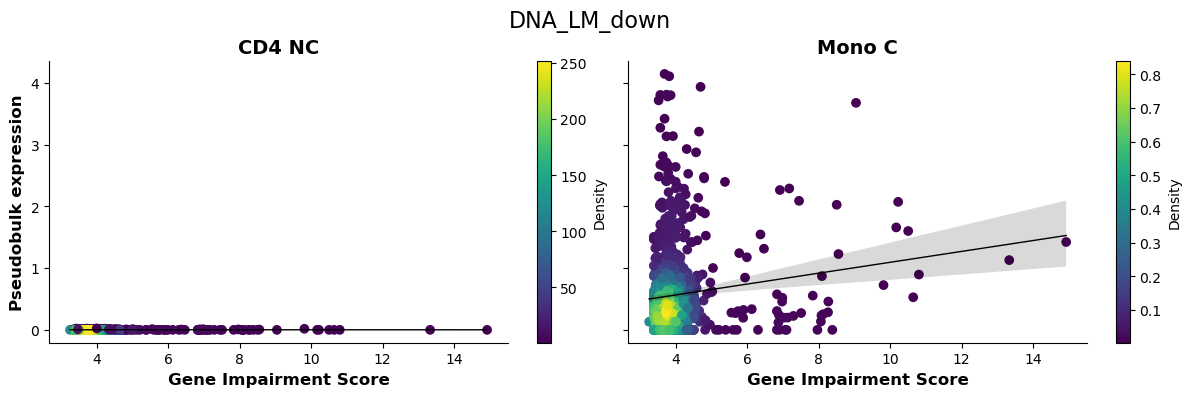

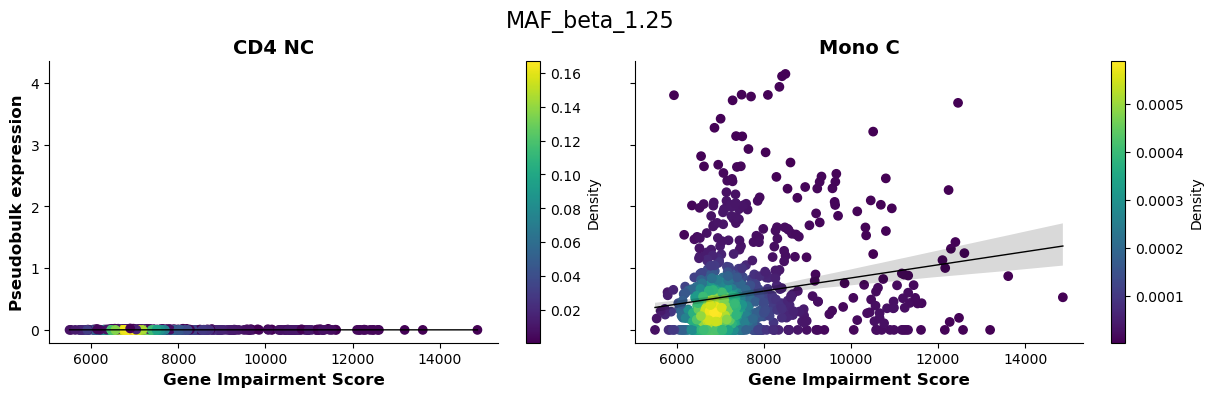

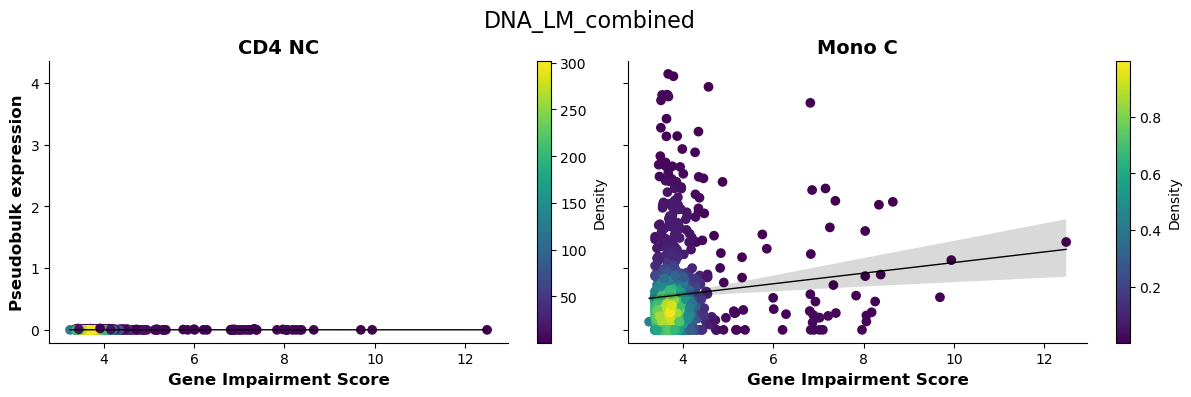

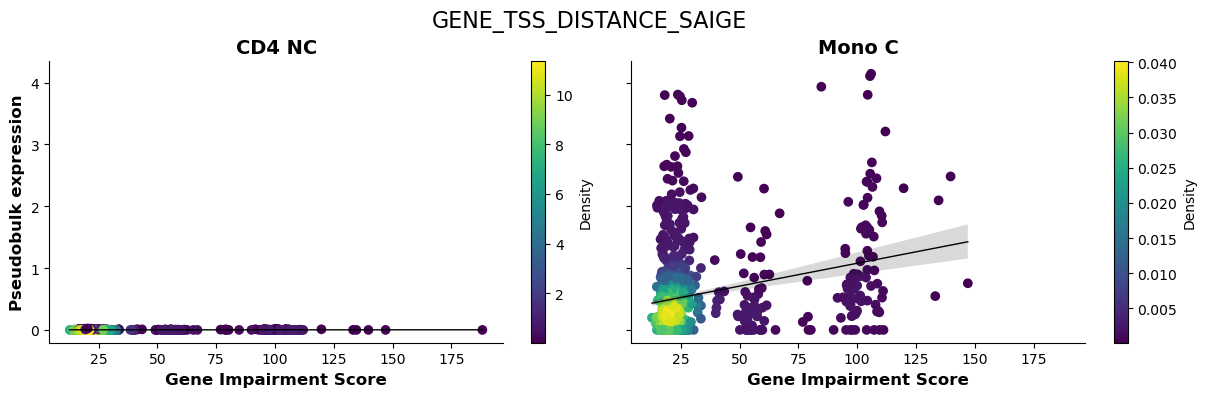

In [10]:
df_burdens_chrom = df_burdens[df_burdens["Chromosome"] == chrom]


this_genes=["ENSG00000110203"]
get_pb_plots(data, df_burdens_chrom, eigenvec, chrom, gene_list=this_genes)  # , save_dir=save_dir)

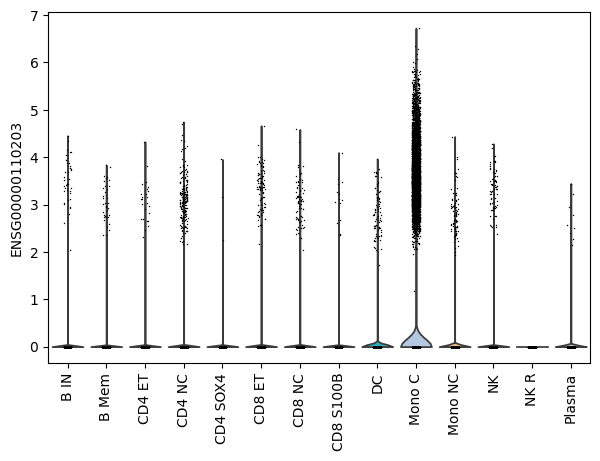

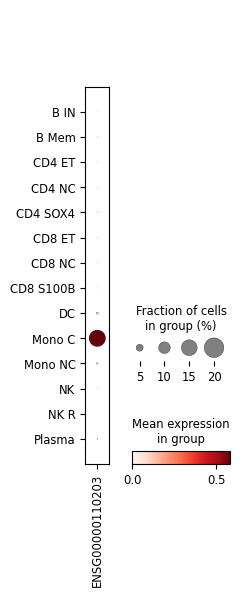

In [11]:
sc.pl.violin(data.adata, keys=["ENSG00000110203"],
             groupby="cell_label",
             rotation=90
            )
sc.pl.dotplot(
    data.adata, 
    var_names=["ENSG00000110203"],  # Gene you want to plot
    groupby="cell_label",            # Group by cell type
    dendrogram=False
)